In [183]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import plothist

In [184]:
def get_dff(df):
    df['dff_p'] = df['pIn(MeV/c)'] - df['pOut(MeV/c)']
    df['dff_px'] = df['pxIn(MeV/c)'] - df['pxOut(MeV/c)']
    df['dff_py'] = df['pyIn(MeV/c)'] - df['pyOut(MeV/c)']
    df['dff_pz'] = df['pzIn(MeV/c)'] - df['pzOut(MeV/c)']
    df['dff_time'] = df['tOut(ns)'] - df['tIn(ns)']
    
    pxIn, pyIn = df['pxIn(MeV/c)'].to_numpy(), df['pyIn(MeV/c)'].to_numpy()
    pxOut,pyOut= df['pxOut(MeV/c)'].to_numpy(), df['pyOut(MeV/c)'].to_numpy()
    pzIn, pzOut= df['pzIn(MeV/c)'].to_numpy(), df['pzOut(MeV/c)'].to_numpy()

    ptIn  = np.hypot(pxIn,  pyIn)
    ptOut = np.hypot(pxOut, pyOut)
    df['ptIn(MeV/c)']     = ptIn
    df['ptOut(MeV/c)']    = ptOut
    df['dff_pt(MeV/c)']   = df['ptIn(MeV/c)'] - df['ptOut(MeV/c)']

    # Theta (polar angle from +z): θ = atan2( pT, pz )
    thIn  = np.arctan2(ptIn,  pzIn)
    thOut = np.arctan2(ptOut, pzOut)
    df['thetaIn(rad)']     = thIn
    df['thetaOu(rad)']    = thOut
    df['dff_theta'] = df['thetaIn(rad)'] -df['thetaOu(rad)'] 

    phiIn  = np.arctan2(pyIn,  pxIn)
    phiOut = np.arctan2(pyOut, pxOut)
    dphi = ((phiOut - phiIn + np.pi) % (2*np.pi)) - np.pi
    df['phiIn'], df['phiOut'], df['dff_phi'] = phiIn, phiOut, dphi
    
    return df
    
def get_dff_rel(df):
    df['rdff_p'] = (df['dff_p'])/df['pIn(MeV/c)']
    df['rdff_px'] = (df['dff_px'])/df['pxIn(MeV/c)'] 
    df['rdff_py'] = (df['dff_py'])/df['pyIn(MeV/c)']
    df['rdff_pz'] = (df['dff_pz'])/df['pzIn(MeV/c)']
    df['rdff_pt(MeV/c)']   = (df['dff_pt(MeV/c)'])/df['ptIn(MeV/c)']
    df['rdff_theta'] = df['dff_theta']/df['thetaIn(rad)']
    df['rdff_phi'] =df['dff_phi']/df['phiIn']

    return df


    

In [185]:
particle=['e-','mu-','pi-','kaon-','proton'] 
radius=[170,240,310,350] #unit mm
thickness=[200,300,400,500,600,700,750] #unit um


df ={}
for p in particle:
    df[p]={}
    for r in radius:
        df[p][r]={}
        for th in thickness:
            df[p][r][th] = pd.read_csv(f'Output/Material_study_30k/Silicon_radius_{r}_thickness_{th}_um_particle_{p}.csv') 
            df[p][r][th] = get_dff(df[p][r][th])
            df[p][r][th] = get_dff_rel(df[p][r][th])
            
    

In [198]:
df[p][r][th].query(f'`ptIn(MeV/c)`<210 and `ptIn(MeV/c)`>190 ') 

,event,track,pdg,pxIn(MeV/c),pyIn(MeV/c),pzIn(MeV/c),pIn(MeV/c),tIn(ns),pxOut(MeV/c),pyOut(MeV/c),...,phiIn,phiOut,dff_phi,rdff_p,rdff_px,rdff_py,rdff_pz,rdff_pt(MeV/c),rdff_theta,rdff_phi
6,523,1,2212,-180.69100,-74.9027,-256.8610,322.858,4.06114,-174.78500,-71.1195,...,-2.748619,-2.755155,-0.006535,0.023410,0.032686,0.050508,0.016593,0.035279,-0.003703,0.002378
20,180,1,2212,133.48500,136.2060,118.2260,224.383,4.04969,118.72600,130.9890,...,0.795487,0.834467,0.038980,0.068637,0.110567,0.038302,0.057365,0.073001,0.007401,0.049001
31,8,1,2212,-173.87700,-117.3800,379.2570,433.414,3.94399,-171.70600,-112.0920,...,-2.547792,-2.563242,-0.015451,0.012279,0.012486,0.045050,0.009149,0.022564,0.011385,0.006064
33,699,1,2212,-3.26512,197.9880,877.6730,899.733,5.25556,-4.38387,195.9630,...,1.587286,1.593164,0.005877,0.003779,-0.342637,0.010228,0.003458,0.010115,0.006465,0.003703
76,1050,1,2212,140.15100,133.8310,-170.2770,257.967,4.01995,126.24100,130.6660,...,0.762335,0.802621,0.040286,0.052282,0.099250,0.023649,0.039295,0.062432,-0.005282,0.052845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25637,29961,1,2212,-205.45300,-32.2021,196.9590,286.427,3.77646,-193.46300,-34.4466,...,-2.986120,-2.965387,0.020734,0.030430,0.058359,-0.069700,0.003671,0.055085,0.032586,-0.006943
25685,29970,1,2212,-137.04500,-153.0980,296.2530,360.537,3.91618,-136.75000,-151.5170,...,-2.300923,-2.305012,-0.004089,0.020616,0.002153,0.010327,0.027389,0.006682,-0.016328,0.001777
25945,29727,1,2212,-162.48400,-115.3970,-11.0247,199.597,3.85335,-152.88000,-100.1720,...,-2.524050,-2.561548,-0.037497,0.083403,0.059107,0.131936,0.274346,0.082881,0.007085,0.014856
25947,29560,1,2212,-107.51000,-158.8540,102.7530,217.603,4.01988,-101.23700,-147.5790,...,-2.165771,-2.172054,-0.006283,0.074838,0.058348,0.070977,0.102721,0.066991,-0.014899,0.002901


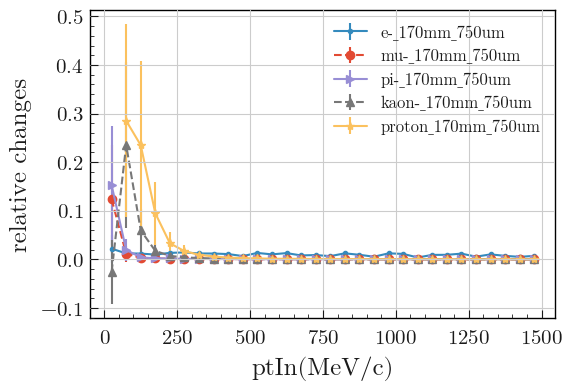

In [179]:
# x_var,y_var,range_x ='pIn(MeV/c)','rdff_p',(0,1500)
# x_var,y_var,range_x ='pzIn(MeV/c)','rdff_pz',(-1500,1500)
x_var,y_var,range_x ='ptIn(MeV/c)','rdff_pt(MeV/c)',(0,1500)
# x_var,y_var,range_x ='thetaIn(rad)','rdff_theta',(0,3.14)
# x_var,y_var,range_x ='phiIn','rdff_phi',(-3.14,3.14)
marker ={'e-':'.-','mu-':'o--','pi-':'>-','kaon-':'^--','proton':'*-'}
plt.figure()
for p in particle:
    # plt.figure()
    for r in [170]:
    # for r in radius:
        for th in [750]:
            # plt.hist(df[p][r][th][x_var],alpha =0.5, label =f'{p}_{r}mm_{th}um')
            # plt.hist(df[p][r][th][y_var]*100/df[p][r][th][x_var],alpha =0.5, label =f'{p}_{r}mm_{th}um',bins =100,range =(0, 1))
            
            plot_profile(df[p][r][th],x_var, y_var, 
                         30, 100, range_x, (0,200), 
                     f'{p}_{r}mm_{th}um', fmt=marker[p], use_eff=False,onlyEff=False, plot= True,plot_std=False)
            
# plt.legend(bbox_to_anchor=(1.,1), ncol=2)
plt.legend( loc='upper right',ncol=1)
plt.ylabel('relative changes')
# plt.ylim(-0.01,0.4)
# plt.xlabel('Momentum_t [MeV/c]')

plt.grid()
        
        # plt.ylabel(y_var)
            # plt.scatter(df[p][r][th][x_var], df[p][r][th][y_var],alpha =0.2)

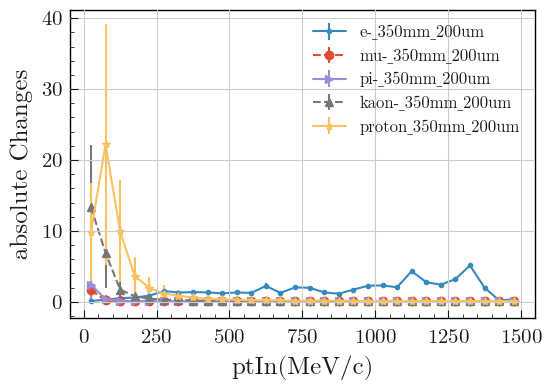

In [181]:
# x_var,y_var,range_x ='pIn(MeV/c)','dff_p',(0,1500)
# x_var,y_var,range_x ='pzIn(MeV/c)','dff_pz',(-1500,1500)
x_var,y_var,range_x ='ptIn(MeV/c)','dff_pt(MeV/c)',(0,1500)
# x_var,y_var,range_x ='thetaIn(rad)','dff_theta',(0,3.14)
# x_var,y_var,range_x ='thetaIn(rad)','dff_theta',(0,3.14)
# x_var,y_var,range_x ='phiIn','dff_phi',(-3.14,3.14)
plt.figure()

for p in particle:
    # plt.figure()
    for r in [350]:
    # for r in radius:
        for th in [200]:
            # plt.hist(df[p][r][th][x_var],alpha =0.5, label =f'{p}_{r}mm_{th}um')
            # plt.hist(df[p][r][th][y_var]*100/df[p][r][th][x_var],alpha =0.5, label =f'{p}_{r}mm_{th}um',bins =100,range =(0, 1))
            plot_profile(df[p][r][th],x_var, y_var, 
                         30, 100, range_x, (0,500), 
                f'{p}_{r}mm_{th}um', fmt=marker[p], use_eff=False,onlyEff=False, plot= True,plot_std=False)
            
            
plt.legend()
plt.ylabel('absolute Changes')
plt.grid()


In [226]:
##
check_point1={}

check_momentum=[200, 500,1000]
radius_check = radius
thickness_check = thickness
particle_check=['e-','mu-','pi-','kaon-','proton'] 
var = 'rdff_pt(MeV/c)'

for i in check_momentum:
    check_point1[i]={}
    for p in particle_check:
        check_point1[i][p] ={}
        for r in radius_check:
            check_point1[i][p][r]={}
            check_point1[i][p][r]['v']=[]
            check_point1[i][p][r]['err']=[]
            for th in thickness_check:
                
    
                df_here = df[p][r][th].query(f'`ptIn(MeV/c)`<{i+10} and `ptIn(MeV/c)`>{i-10}')
                
                check_point1[i][p][r]['v'].append(np.mean( df_here[var]))
                check_point1[i][p][r]['err'].append(np.std( df_here[var]))

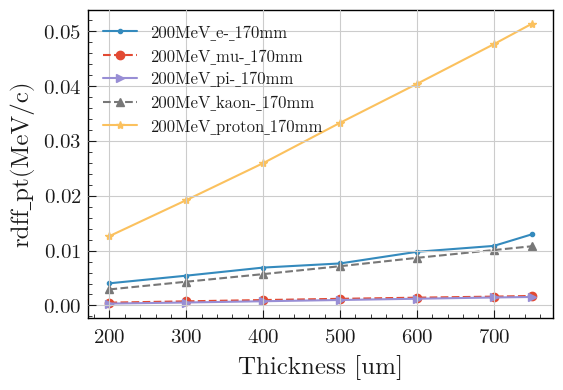

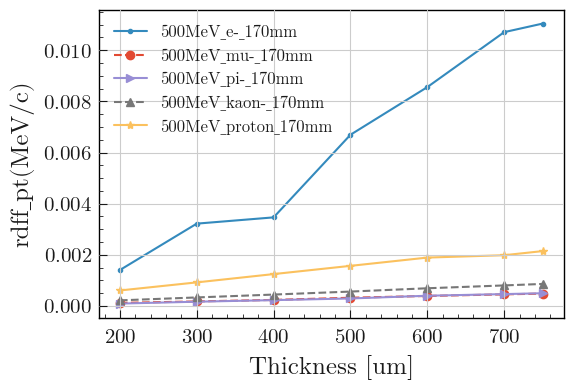

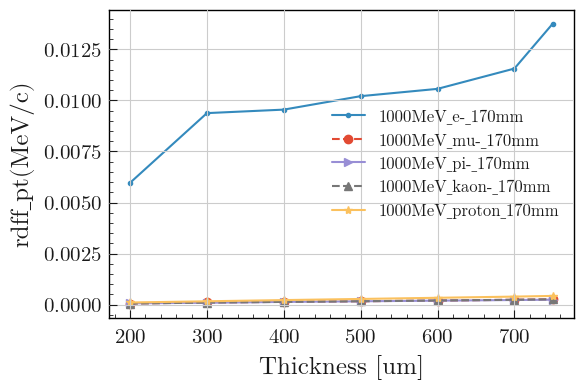

In [227]:
for i in check_momentum:
    plt.figure()
    for p in particle_check:
        for r in [170]:
            # print(check_point1[i][p][r]['v'])
            plt.errorbar(thickness_check, check_point1[i][p][r]['v'], 
                         # yerr= check_point1[i][p][r]['err'], 
                         fmt=marker[p],
                         label =f'{i}MeV_{p}_{r}mm')

    
    plt.legend()
    plt.grid()
    plt.xlabel('Thickness [um]')
    plt.ylabel(var)
            